In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
import matplotlib 
matplotlib.rc_file_defaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)
import datetime
pd.set_option('display.max_columns', None)

In [69]:
# Cargamos los datos
file_stats = "SQMStats_Pangamos_20210830-20220203v3.xlsx"
df = pd.read_excel(file_stats)
df_mop = df[(df["Producto"].notna()) & (df["Producto"].str.contains("MOP")) 
            & df["Hora Ingreso a Puerto"].notna() & df["Hora Legada a Espera"].notna()]
df_mop.shape

(3218, 32)

In [70]:
# Dejamos columnas importantes
cols = df_mop.columns
cols = cols[~cols.str.contains("Unnamed")]
df_mop = df_mop[cols]

In [41]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,20210830 19:44:12,752.233333,20210831 08:29:21,98.133333,11.116667,[uDeposito,uStacking]


In [71]:
# Transformamos fechas en formato datetime
df_mop["Hora Ingreso a Puerto"] = pd.to_datetime(df_mop["Hora Ingreso a Puerto"])
df_mop["Hora Legada a Espera"] = pd.to_datetime(df_mop["Hora Legada a Espera"])

In [43]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking]


In [72]:
# Definimos la funcion que nos dice si es un turno nocturno
def Nocturno(t):
    if t > datetime.time(23,0,0):
        return True
    elif t < datetime.time(8,0,0):
        return True
    else: 
        return False

In [73]:
# Agregamos la columna Turno Nocturno
df_mop["Turno Nocturno"] = df_mop["Hora Legada a Espera"].apply(lambda x: Nocturno(x.time()))

In [74]:
# Agregamos columna de Fecha de entrada a Espera
df_mop["Fecha en Espera"] = df_mop["Hora Legada a Espera"].apply(lambda x: x.date())

In [87]:
df_mop[df_mop["Turno Nocturno"]==True].head(5)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Turno Nocturno,Fecha en Espera
47,Astudillo,PDWC66,GPS,124876,20210830 17:15:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 15:50:15,20210830 15:50:15,Puerto Angamos,20210831 12:08:46,2021-08-30 23:00:05,745.100000,2021-08-31 11:31:11,37.583333,17.616667,[uDeposito,uStacking],True,2021-08-30
49,Astudillo,PJCJ13,GPS,124887,20210830 18:13:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 16:29:15,20210830 16:29:15,Puerto Angamos,20210831 12:13:46,2021-08-30 23:11:37,739.350000,2021-08-31 11:31:54,41.866667,15.533333,[uDeposito,uStacking],True,2021-08-30
50,Astudillo,PDWC64,GPS,124894,20210830 18:35:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 16:42:56,20210830 16:42:56,Puerto Angamos,20210831 12:14:56,2021-08-30 23:11:25,743.583333,2021-08-31 11:35:00,39.933333,16.933333,[uDeposito,uStacking],True,2021-08-30
51,Astudillo,PTLR16,GPS,124882,20210830 17:50:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 16:06:43,20210830 16:06:43,Puerto Angamos,20210831 12:17:32,2021-08-30 23:12:49,742.566667,2021-08-31 11:37:30,40.033333,14.650000,[uDeposito,uStacking],True,2021-08-30
52,Astudillo,PFVH41,GPS,124891,20210830 18:25:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 16:38:19,20210830 16:38:19,Puerto Angamos,20210831 12:22:07,2021-08-30 23:22:45,736.016667,2021-08-31 11:39:11,42.933333,10.533333,[uDeposito,uStacking],True,2021-08-30


In [75]:
# Generamos la lista de fechas con Turno Nocturno
fechas_nocturnas = df_mop["Fecha en Espera"][df_mop["Turno Nocturno"] == True].unique()

In [88]:
fechas_nocturnas

array([datetime.date(2021, 8, 30), datetime.date(2021, 8, 31),
       datetime.date(2021, 9, 1), datetime.date(2021, 9, 2),
       datetime.date(2021, 9, 3), datetime.date(2021, 9, 4),
       datetime.date(2021, 9, 5), datetime.date(2021, 9, 6),
       datetime.date(2021, 9, 7), datetime.date(2021, 9, 8),
       datetime.date(2021, 9, 23), datetime.date(2021, 9, 24),
       datetime.date(2021, 9, 25), datetime.date(2021, 9, 26),
       datetime.date(2021, 9, 27), datetime.date(2021, 9, 28),
       datetime.date(2021, 9, 29), datetime.date(2021, 9, 30),
       datetime.date(2021, 10, 1), datetime.date(2021, 10, 2),
       datetime.date(2021, 10, 3), datetime.date(2021, 10, 4),
       datetime.date(2022, 1, 17), datetime.date(2022, 1, 21),
       datetime.date(2022, 1, 23), datetime.date(2022, 1, 24),
       datetime.date(2022, 1, 25), datetime.date(2022, 1, 26),
       datetime.date(2022, 1, 27), datetime.date(2022, 1, 28),
       datetime.date(2022, 1, 29), datetime.date(2022, 1, 30),


In [77]:
# Defino un DataFrame solo con los turnos nocturnos 
df_noct = df_mop[df_mop["Turno Nocturno"] == True]

In [78]:
# Reinicio el indice
df_noct.reset_index(drop = True, inplace = True)

In [52]:
df_noct.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Turno Nocturno,Fecha en Espera
0,Astudillo,PDWC66,GPS,124876,20210830 17:15:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 15:50:15,20210830 15:50:15,Puerto Angamos,20210831 12:08:46,2021-08-30 23:00:05,745.1,2021-08-31 11:31:11,37.583333,17.616667,[uDeposito,uStacking],True,2021-08-30


In [53]:
df_noct["Hora Ingreso a Puerto"][0].date() > df_noct["Hora Legada a Espera"][0].date()

True

In [79]:
# Definimos la funcion que entrega si la descarga ocurre despues de las 8.30
def Descarga(te, tp):
    if te.time() < datetime.time(8,0,0):
        if tp.time() > datetime.time(8,30,0):
            return True
    else:
        if tp.time() > datetime.time(8,30,0):
            return True
        else:
            return False

In [80]:
# Creamos una nueva columna que diga si ocurre la descarga en horario de puerto
df_noct["Descarga en Apertura"] = df_noct.apply(lambda x: Descarga(x["Hora Legada a Espera"], x["Hora Ingreso a Puerto"]), axis = 1)

<ipython-input-80-06f5b5192015>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noct["Descarga en Apertura"] = df_noct.apply(lambda x: Descarga(x["Hora Legada a Espera"], x["Hora Ingreso a Puerto"]), axis = 1)


In [81]:
df_noct[df_noct["Descarga en Apertura"] == True].head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Turno Nocturno,Fecha en Espera,Descarga en Apertura
0,Astudillo,PDWC66,GPS,124876,20210830 17:15:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 15:50:15,20210830 15:50:15,Puerto Angamos,20210831 12:08:46,2021-08-30 23:00:05,745.1,2021-08-31 11:31:11,37.583333,17.616667,[uDeposito,uStacking],True,2021-08-30,True


In [82]:
# Creamos una lista con las fechas en espera solo donde ocurrio descarga
fechas_descarga = df_noct["Fecha en Espera"][df_noct["Descarga en Apertura"] == True].unique()

In [83]:
# Hacemos el conteo de camiones

N_desc = []
for i in fechas_descarga:
    a = df_noct[df_noct["Fecha en Espera"] == i]
    N_desc.append(a.shape[0])
    
N_desc = np.array(N_desc)

In [84]:
# creamos la lista con string de fechas
f_descarga = np.array([str(i) for i in fechas_descarga])
f_descarga

array(['2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
       '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06',
       '2021-09-07', '2021-09-08', '2021-09-23', '2021-09-24',
       '2021-09-25', '2021-09-27', '2021-09-28', '2021-09-29',
       '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03',
       '2021-10-04', '2022-01-17', '2022-01-21', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
       '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31',
       '2022-02-01', '2022-02-02'], dtype='<U10')

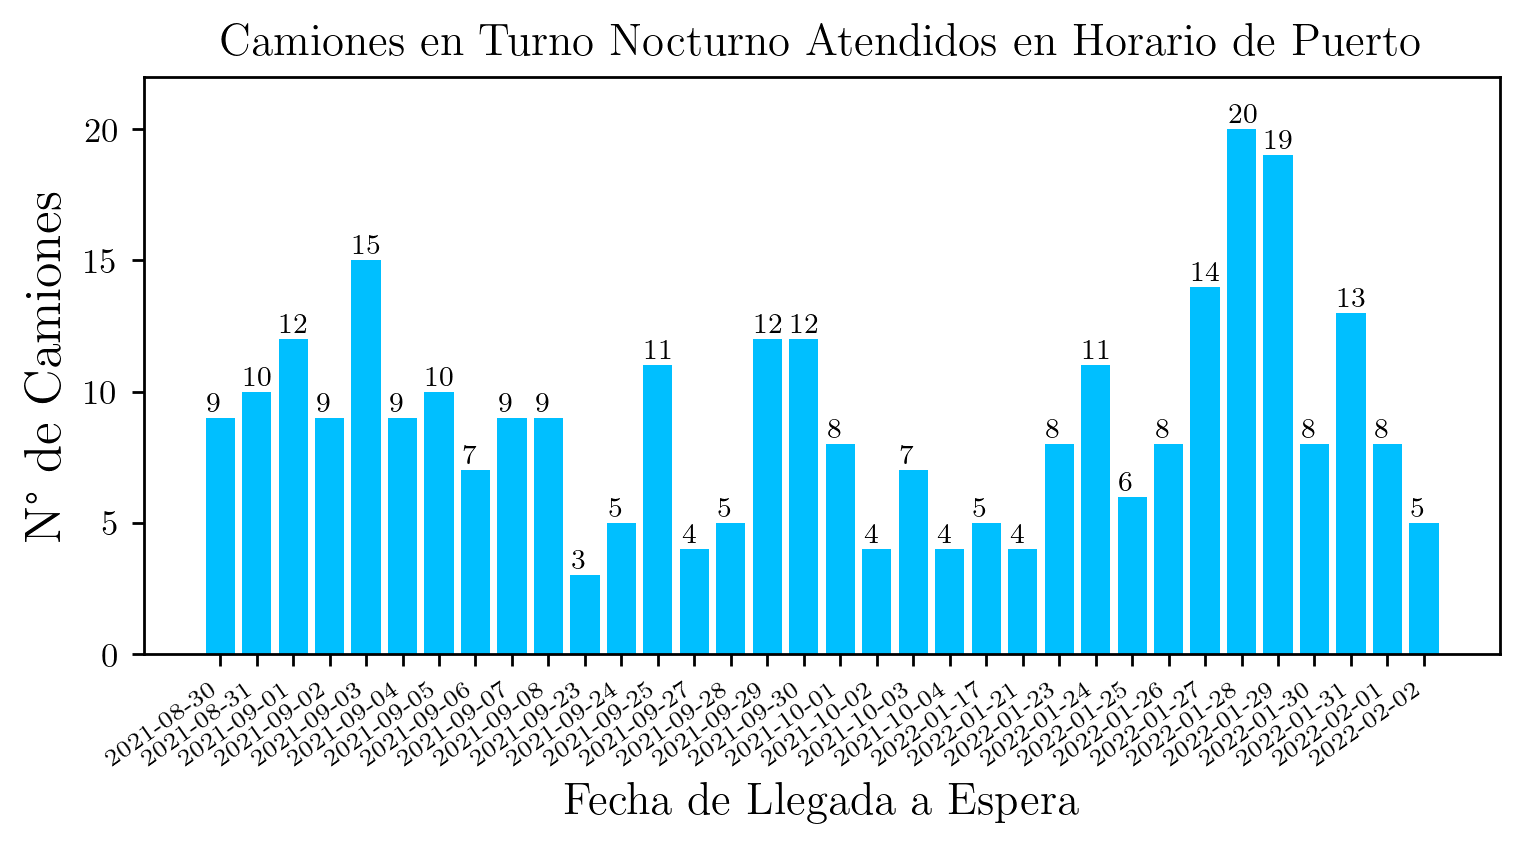

In [85]:
# Ploteamos

fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


#ax2.plot(Rangos, Mean_Trucks, "ro", label = "Tiempo Prom.")
ax2.bar(f_descarga, N_desc, label = "N° Camiones Por Día", color = "deepskyblue" )
ax2.set_title("Camiones en Turno Nocturno Atendidos en Horario de Puerto", fontsize = 13)
ax2.set_ylabel("N° de Camiones", fontsize = 15)

ax2.set_xticks(f_descarga)
ax2.set_xticklabels(f_descarga, rotation = 35, fontsize = 7, fontdict = {"horizontalalignment": "right"}) #xtick, fontsize=10,
ax2.set_xlabel("Fecha de Llegada a Espera", fontsize = 13)
ax2.set_ylim([0,22])
#ax2.grid()
#ax2.legend()
#ax2.axhline(y = T_semana.mean(), c = "r", 
                #linestyle = "--", linewidth = 1, label = "Tiempo Promedio \n Semanal")


for i, label in enumerate(N_desc):
    if label != 0.:
        plt.annotate(str(round(label)), (i-0.35, N_desc[i]+0.25), fontsize = 8)

plt.savefig("Graficos/Camiones en Turno Nocturno Atendidos en Horario de Puerto.png", bbox_inches= "tight")

In [61]:
# queremos ver ahora 
df_noct["Fecha en Puerto"] = df_noct["Hora Ingreso a Puerto"].apply(lambda x: x.date())

<ipython-input-61-4ae8a189fa6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noct["Fecha en Puerto"] = df_noct["Hora Ingreso a Puerto"].apply(lambda x: x.date())


In [62]:
fechas_puerto = df_noct["Fecha en Puerto"][df_noct["Descarga en Apertura"] == True].unique()

In [63]:
N_puerto = []
for i in fechas_puerto:
    a = df_noct[df_noct["Fecha en Puerto"] == i]
    N_puerto.append(a.shape[0])
    
N_puerto = np.array(N_puerto)

In [64]:
f_puerto = np.array([str(i) for i in fechas_puerto])
f_puerto.size

35

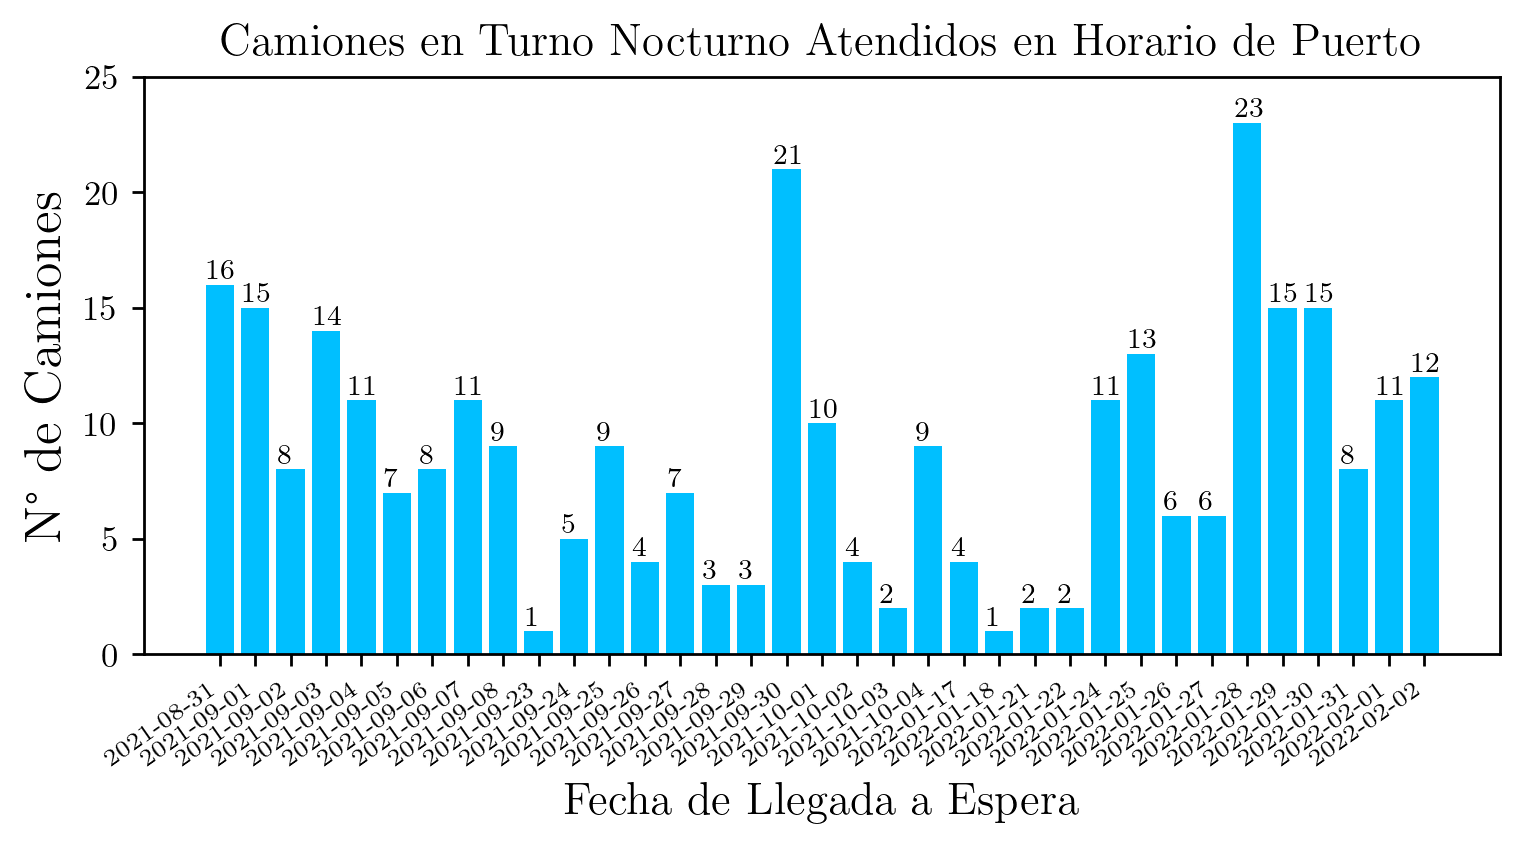

In [68]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


#ax2.plot(Rangos, Mean_Trucks, "ro", label = "Tiempo Prom.")
ax2.bar(f_puerto, N_puerto, label = "N° Camiones Por Día", color = "deepskyblue" )
ax2.set_title("Camiones en Turno Nocturno Atendidos en Horario de Puerto", fontsize = 13)
ax2.set_ylabel("N° de Camiones", fontsize = 15)

ax2.set_xticks(f_puerto)
ax2.set_xticklabels(f_puerto, rotation = 35, fontsize = 7, fontdict = {"horizontalalignment": "right"}) #xtick, fontsize=10,
ax2.set_xlabel("Fecha de Llegada a Espera", fontsize = 13)
ax2.set_ylim([0,25])
#ax2.grid()
#ax2.legend()
#ax2.axhline(y = T_semana.mean(), c = "r", 
                #linestyle = "--", linewidth = 1, label = "Tiempo Promedio \n Semanal")


for i, label in enumerate(N_puerto):
    if label != 0.:
        plt.annotate(str(round(label)), (i-0.35, N_puerto[i]+0.25), fontsize = 8)

#plt.savefig("Graficos/Camiones en Turno Nocturno Atendidos en Horario de Puerto.png", bbox_inches= "tight")

In [66]:
 N_puerto.size, fechas_puerto.size

(35, 35)

In [67]:
N_desc.sum(), N_puerto.sum()

(303, 306)